In [83]:
import sqlite3

In [85]:
# Connect to SQLite DB
conn = sqlite3.connect('sales_data.db')

In [87]:
cursor = conn.cursor()

In [89]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price_per_unit REAL,
        sale_date TEXT
    )
''')

In [93]:
sample_data = [
    ('Apples', 10, 1.2, '2025-04-01'),
    ('Bananas', 5, 0.5, '2025-04-02'),
    ('Oranges', 7, 0.8, '2025-04-02'),
    ('Apples', 4, 1.2, '2025-04-03'),
    ('Bananas', 6, 0.5, '2025-04-03')
]

In [95]:
cursor.executemany('INSERT INTO sales (product, quantity, price_per_unit, sale_date) VALUES (?, ?, ?, ?)', sample_data)

In [97]:
conn.commit()
conn.close()

In [99]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
conn = sqlite3.connect('sales_data.db')

In [103]:
df

,product,total_qty,revenue
0,Apples,28,33.6
1,Bananas,22,11.0
2,Oranges,14,11.2


In [105]:
query = '''
    SELECT 
        product,
        SUM(quantity) AS total_qty,
        SUM(quantity * price_per_unit) AS revenue
    FROM sales
    GROUP BY product
'''

In [107]:
df = pd.read_sql_query(query, conn)
conn.close()

In [109]:
print("Sales Summary:")
print(df)

Sales Summary:
   product  total_qty  revenue
0   Apples         14     16.8
1  Bananas         11      5.5
2  Oranges          7      5.6


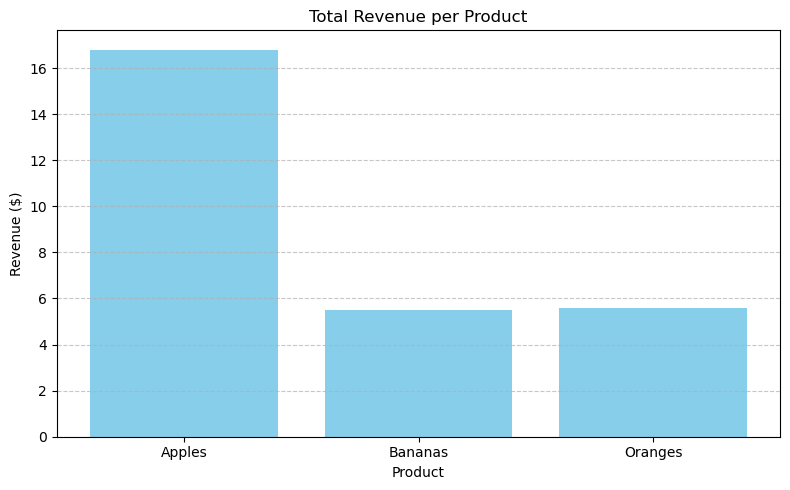

In [111]:
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title('Total Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./current_gig.jpeg')
plt.show()